<a href="https://colab.research.google.com/github/Thirissha/HemoScan/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/brain_ct_split.zip'  # Update if needed
extract_path = '/content/brain_ct_split'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
val_test_gen = ImageDataGenerator(rescale=1./255)

# Update extract_path to point to the actual data directory
data_path = extract_path + '/brain_ct_split'

train_data = train_gen.flow_from_directory(
    data_path + '/train', target_size=img_size, batch_size=batch_size, class_mode='binary')

val_data = val_test_gen.flow_from_directory(
    data_path + '/val', target_size=img_size, batch_size=batch_size, class_mode='binary')

test_data = val_test_gen.flow_from_directory(
    data_path + '/test', target_size=img_size, batch_size=batch_size, class_mode='binary', shuffle=False)

Found 4302 images belonging to 2 classes.
Found 538 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Freeze base model for initial training
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import os

# List the contents of the extracted directory
extracted_contents = os.listdir(extract_path)
print(f"Contents of {extract_path}: {extracted_contents}")

# If the extracted contents include a subdirectory that contains 'train', 'val', and 'test'
# then update the extract_path to point to that subdirectory.
# Otherwise, the zip file structure is unexpected.

# Example: If the zip extracted into '/content/brain_ct_split/data'
# and 'data' contains 'train', 'val', and 'test', update extract_path
# based on the printed contents.

Contents of /content/brain_ct_split: ['brain_ct_split']


In [ ]:
import os

# Update this path based on your actual extraction
extract_path = '/content/brain_ct_split/brain_ct_split'

train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'val')
test_dir = os.path.join(extract_path, 'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values and apply augmentation to training data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 4302 images belonging to 2 classes.
Found 538 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


In [ ]:
import os

extract_path = '/content/brain_ct_split'  # or wherever you extracted your ZIP
print("Contents of extract_path:", os.listdir(extract_path))


Contents of extract_path: ['brain_ct_split']


In [ ]:
import os

inner_path = os.path.join(extract_path, 'brain_ct_split')
print("Contents of brain_ct_split:", os.listdir(inner_path))


Contents of brain_ct_split: ['train', 'val', 'test']


In [ ]:
train_dir = os.path.join(inner_path, 'train')  # or 'training' if that's the folder name
val_dir = os.path.join(inner_path, 'val')
test_dir = os.path.join(inner_path, 'test')


In [ ]:
print("Train directory exists:", os.path.exists(train_dir))


Train directory exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 4302 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output: hemorrhage or not
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(224, 224, 3)),  # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.5927 - loss: 1.0052 - val_accuracy: 0.7249 - val_loss: 0.5410
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.7324 - loss: 0.5297 - val_accuracy: 0.7770 - val_loss: 0.4052
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - accuracy: 0.8180 - loss: 0.3986 - val_accuracy: 0.8457 - val_loss: 0.3198
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - accuracy: 0.8512 - loss: 0.3253 - val_accuracy: 0.9257 - val_loss: 0.2081
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 468s 3s/step - accuracy: 0.8752 - loss: 0.2828 - val_accuracy: 0.9368 - val_loss: 0.1839
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9057 - loss: 0.2308 - val_accuracy: 0.9182 - val_loss: 0.1534
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 456s 3s/step - accuracy: 0.9144 - loss: 0.1985 - val_accuracy: 0.9275 - val_loss: 0.1657
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.9276 - loss: 0.1720 - val_accu

In [ ]:
# Save the trained model
model.save('hemorrhage_detector.h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to your test folder
test_dir = '/content/brain_ct_split/brain_ct_split/test'  # adjust if needed

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 538 images belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_gen)
print(f"✅ Overall Test Accuracy: {accuracy:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 911ms/step - accuracy: 0.9756 - loss: 0.0749
✅ Overall Test Accuracy: 0.9665


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [ ]:
model = tf.keras.models.load_model('hemorrhage_detector.h5')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving i2.png to i2 (1).png


In [ ]:
img_path = '/content/ i2 (1).png'  # or whatever filename you uploaded


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'i2.png', 'drive', 'n1.jpg', 'Nimg30.jpg', 'hemorrhage_detector.h5', 'brain_ct_split', 'i2 (1).png', 'himg19.jpg', 'Nimg24.jpg', 'Nimg143.jpg', 'Nimg66.jpg', 'himg2.JPG', 'sample_data']


In [ ]:
img_path = '/content/i2 (1).png'


In [ ]:
from PIL import Image
import numpy as np

img_path = '/content/i2 (1).png'  # or whatever filename you uploaded

# Ensure image has 3 channels (RGB)
img = Image.open(img_path).convert('RGB').resize((224, 224))

img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('hemorrhage_detector.h5')

# Explicitly build the model after loading
model.build((None, 224, 224, 3))

In [ ]:
import os
print(os.listdir('/content'))


['.config', 'i2.png', 'drive', 'n1.jpg', 'Nimg30.jpg', 'hemorrhage_detector.h5', 'brain_ct_split', 'i2 (1).png', 'himg19.jpg', 'Nimg24.jpg', 'Nimg143.jpg', 'Nimg66.jpg', 'himg2.JPG', 'sample_data']


In [ ]:
img_path = '/content/i2 (1).png'  # update this if your filename is different


In [ ]:
from PIL import Image
import numpy as np

img = Image.open(img_path).resize((224, 224))
img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('hemorrhage_detector.h5')


In [ ]:
from PIL import Image
import numpy as np

img_path = '/content/i2 (1).png'  # or your actual uploaded filename

# Force image to RGB (3 channels)
img = Image.open(img_path).convert('RGB').resize((224, 224))

# Normalize and reshape
img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)  # shape: (1, 224, 224, 3)


In [ ]:
prediction = model.predict(input_image)[0][0]
result = " No Hemorrhage Detected" if prediction > 0.5 else "Hemorrhage"
print(f"🧠 Prediction: {result} ")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
🧠 Prediction: Hemorrhage 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
🧠 Prediction: Hemorrhage 


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_1179']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


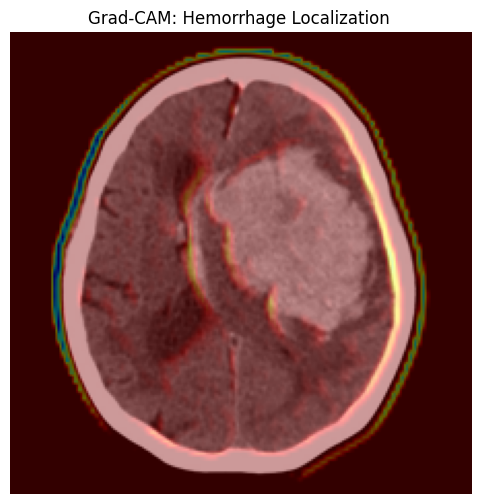

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load and preprocess image
img_path = '/content/i2 (1).png'
img = Image.open(img_path).convert('RGB').resize((224, 224))
img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)

# Rebuild your CNN as a Functional model
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3,3), activation='relu', name='conv2d_1')(inputs)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu', name='conv2d_2')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

functional_model = Model(inputs, outputs)

# Load weights from your saved Sequential model
functional_model.load_weights('hemorrhage_detector.h5')

# Define Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Identify last conv layer name
last_conv_layer_name = 'conv2d_2'  # based on your functional model

# Run prediction
prediction = functional_model.predict(input_image)[0][0]
result = "No Hemorrhage Detected" if prediction > 0.5 else "Hemorrhage"
print(f"🧠 Prediction: {result} ")

if prediction <= 0.5:
    # Generate heatmap
    heatmap = make_gradcam_heatmap(input_image, functional_model, last_conv_layer_name)

    # Resize and apply color map
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay on original image
    original = np.array(img)
    overlay = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

    # Display Grad-CAM
    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.title(f"Grad-CAM: Hemorrhage Localization ")
    plt.axis('off')
    plt.show()
else:
    print("🧠 No hemorrhage present — displaying normal brain image.")

    # Display original image
    plt.figure(figsize=(6,6))
    plt.imshow(np.array(img))
    plt.title("Normal Brain CT")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
files.download('hemorrhage_detector.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
img = Image.open(img_path).convert('RGB').resize((224, 224))


In [ ]:
img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,523 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that outputs the last convolutional layer and the final output
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Watch the input tensor
        tape.watch(img_array)
        # Get the output of the last convolutional layer and the predictions
        conv_outputs, predictions = grad_model(img_array)

        if pred_index is None:
            # Use the predicted class index
            pred_index = tf.argmax(predictions[0])
            # Ensure pred_index is a scalar integer
            if tf.is_tensor(pred_index):
                pred_index = pred_index.numpy()
            pred_index = int(pred_index) # Cast to int

        # Get the loss for the predicted class
        class_channel = predictions[:, pred_index]

    # Compute the gradient of the top predicted class with respect to the output of the last convolutional layer
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients across all the spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important" this channel is
    # with regard to the top predicted class
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]

    # Remove the last dimension to get a 2D heatmap
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
_ = model.predict(input_image)  # triggers model call


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3,3), activation='relu', name='conv2d_4')(inputs)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu', name='conv2d_5')(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
_ = model.predict(input_image)  # triggers model call


In [ ]:
heatmap = make_gradcam_heatmap(input_image, model, last_conv_layer_name='conv2d_5')


In [ ]:
import tensorflow as tf

input_tensor = tf.convert_to_tensor(input_image)
prediction = model(input_tensor)[0][0]


In [ ]:
heatmap = make_gradcam_heatmap(input_image, model, last_conv_layer_name='conv2d_5')


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Resize and apply color map
heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Overlay on original image
original = np.array(img)
overlay = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

# Display
plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title("Grad-CAM: Hemorrhage Localization")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load image
img_path = '/content/i2.png'  # update if filename differs
img = Image.open(img_path).convert('RGB').resize((224, 224))
img_array = np.array(img) / 255.0
input_image = np.expand_dims(img_array, axis=0).astype(np.float32)

# Load model
model = tf.keras.models.load_model('hemorrhage_detector.h5')

# Run prediction
prediction = model.predict(input_image)[0][0]
result = "Hemorrhage Detected" if prediction > 0.5 else "No Hemorrhage"
print(f"🧠 Prediction: {result} (Confidence: {prediction:.2f})")

# Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# If hemorrhage is detected, show heatmap
if prediction > 0.5:
    heatmap = make_gradcam_heatmap(input_image, model, last_conv_layer_name='conv2d_5')
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.title("Grad-CAM: Hemorrhage Localization")
    plt.axis('off')
    plt.show()


In [ ]:
img = Image.open(img_path).convert('RGB').resize((224, 224))
img_array = np.array(img).astype(np.float32) / 255.0
input_image = np.expand_dims(img_array, axis=0)


In [ ]:
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.save('resnet_hemorrhage_detector.h5')

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('resnet_hemorrhage_detector.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/brain_ct_split/brain_ct_split/test'  # update if needed

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 538 images belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9756 - loss: 0.0749
Test Accuracy: 0.9665


In [ ]:
preds = functional_model.predict(test_gen)
predicted_labels = (preds > 0.5).astype(int).flatten()


17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 932ms/step


In [ ]:
filenames = test_gen.filenames
true_labels = test_gen.classes
class_indices = test_gen.class_indices
index_to_class = {v: k for k, v in class_indices.items()}


In [ ]:
predicted_names = [index_to_class[label] for label in predicted_labels]
actual_names = [index_to_class[label] for label in true_labels]


Original model layer names: ['conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_4', 'dropout_1', 'dense_5']
Weights loaded successfully into the functional model.
Using layer 'conv2d_functional_2' for Grad-CAM with functional model.


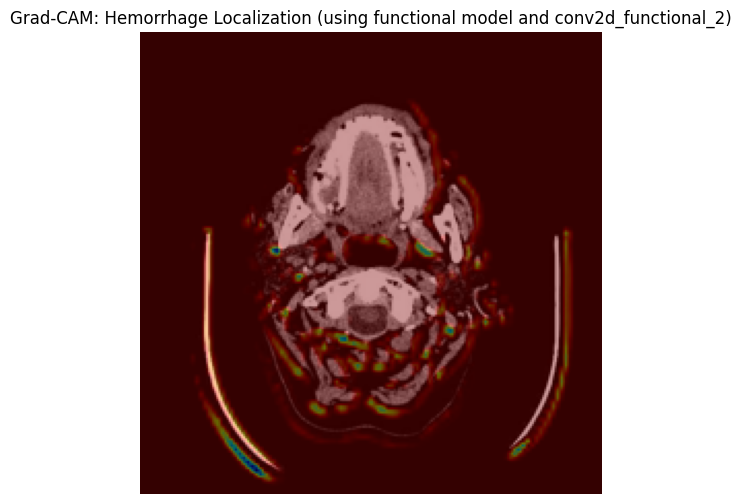

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assume img_path is defined from a previous cell, e.g., '/content/i2.png'
# Assume make_gradcam_heatmap function is defined in a previous cell

# Reconstruct the simple CNN model using the functional API
inputs = Input(shape=(224, 224, 3))
x = Conv2D(32, (3,3), activation='relu', name='conv2d_functional_1')(inputs) # Giving specific names
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu', name='conv2d_functional_2')(x) # Giving specific names
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

functional_model = Model(inputs, outputs)

# Load weights from the saved model
# Note: Layer names might differ if you trained multiple models.
# You might need to inspect the loaded model's layers to match names.
try:
    # Re-load the original Sequential model to get layer names
    original_model = tf.keras.models.load_model('hemorrhage_detector.h5')
    original_layer_names = [layer.name for layer in original_model.layers]
    print(f"Original model layer names: {original_layer_names}")

    # Map original layer names to functional model layer names
    # Assuming the order of layers is the same
    layer_name_map = {}
    original_conv_layers = [layer for layer in original_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    functional_conv_layers = [layer for layer in functional_model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

    for i in range(min(len(original_conv_layers), len(functional_conv_layers))):
        layer_name_map[original_conv_layers[i].name] = functional_conv_layers[i].name

    # Iterate through layers and load weights by mapping names
    for layer in original_model.layers:
        if layer.name in layer_name_map:
             functional_model.get_layer(layer_name_map[layer.name]).set_weights(layer.get_weights())
        elif layer.name in [l.name for l in functional_model.layers]: # for Dense and other layers
             functional_model.get_layer(layer.name).set_weights(layer.get_weights())


    print("Weights loaded successfully into the functional model.")
except Exception as e:
    print(f"Error loading weights: {e}")

# Now use functional_model for Grad-CAM
# Find the last convolutional layer name in this functional model
last_conv_layer_name = None
for layer in functional_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name # This will be 'conv2d_functional_2'

if last_conv_layer_name is None:
    print("Error: No convolutional layer found in the functional model.")
else:
    print(f"Using layer '{last_conv_layer_name}' for Grad-CAM with functional model.")

    # Load and preprocess the image again, ensuring it's a TensorFlow Tensor
    img = Image.open(img_path).convert('RGB').resize((224, 224))
    img_array = np.array(img) / 255.0
    input_image_tensor = tf.convert_to_tensor(np.expand_dims(img_array, axis=0).astype(np.float32))


    # Generate heatmap
    heatmap = make_gradcam_heatmap(input_image_tensor, functional_model, last_conv_layer_name)

    # Resize and apply color map (assuming 'img' from previous cells is available)
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay on original image
    original = np.array(img)
    overlay = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(overlay)
    plt.title(f"Grad-CAM: Hemorrhage Localization (using functional model and {last_conv_layer_name})")
    plt.axis('off')
    plt.show()

In [ ]:
# Assuming test_gen is already defined from previous cells

# Get filenames, true labels, and class indices from the test generator
filenames = test_gen.filenames
true_labels = test_gen.classes
class_indices = test_gen.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Get predictions from the model
# Assuming functional_model is the model you want to use for prediction
preds = functional_model.predict(test_gen)
predicted_labels = (preds > 0.5).astype(int).flatten()

# Map predicted and true labels to class names
predicted_names = [index_to_class[label] for label in predicted_labels]
actual_names = [index_to_class[label] for label in true_labels]

import pandas as pd

results_df = pd.DataFrame({
    'Filename': filenames,
    'Predicted': predicted_names,
    'Actual': actual_names
})

print(results_df.head(10))  # Show first 20 predictions

17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 959ms/step
                  Filename   Predicted      Actual
0  Hemorrhage/himg1019.jpg      Normal  Hemorrhage
1   Hemorrhage/himg102.jpg  Hemorrhage  Hemorrhage
2  Hemorrhage/himg1036.jpg  Hemorrhage  Hemorrhage
3  Hemorrhage/himg1059.jpg  Hemorrhage  Hemorrhage
4  Hemorrhage/himg1070.jpg  Hemorrhage  Hemorrhage
5  Hemorrhage/himg1073.jpg  Hemorrhage  Hemorrhage
6  Hemorrhage/himg1075.jpg  Hemorrhage  Hemorrhage
7  Hemorrhage/himg1087.jpg      Normal  Hemorrhage
8   Hemorrhage/himg109.jpg  Hemorrhage  Hemorrhage
9  Hemorrhage/himg1096.jpg  Hemorrhage  Hemorrhage
